# Python Questions - Classification

### Work made by:
- Teresa Álvarez de Portugal

- Esther Rodríguez García

In [1]:
#we import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

1.  Select all the data from table `credit_card_data` to check if the data was imported correctly.

In [3]:
ccm = pd.read_excel('creditcardmarketing.xlsx')

#data was imported correctly

2.  Select all the data from the table to verify if the command worked. Limit your returned results to 10.

In [4]:
ccm.head(10)
#the command is working and returns the first 10 results

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
5,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
8,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
9,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0


3.  Use code to find how many rows of data you have.

In [5]:
ccm.shape
#the file has 17 rows and 18000 columns

(18000, 17)

4.  Now find the unique values in some of columns:

    - What are the unique values in the column `Offer Accepted`?
    - What are the unique values in the column `Reward`?
    - What are the unique values in the column `Mailer Type`?
    - What are the unique values in the column `# Credit Cards Held`?
    - What are the unique values in the column `household_size`?


In [7]:
#Now it will show us the unique values of each chosen column and its type:

In [8]:
ccm['Offer Accepted'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
ccm['Reward'].unique()

array(['Air Miles', 'Cash Back', 'Points'], dtype=object)

In [10]:
ccm['Mailer Type'].unique()

array(['Letter', 'Postcard'], dtype=object)

In [11]:
ccm['# Credit Cards Held'].unique()

array([2, 1, 3, 4], dtype=int64)

In [12]:
ccm['Household Size'].unique()

array([4, 5, 2, 6, 3, 1, 8, 9], dtype=int64)

5.  Arrange the data in decreasing order by the `average_balance`. Return only the `customer_number` of the top 10 customers with the highest `average_balances` in your data.

In [13]:
ccm.sort_values(by='Average Balance', ascending=False).head(10)['Customer Number']

2296      2297
12635    12636
8887      8888
10576    10577
14003    14004
10475    10476
2655      2656
15259    15260
15608    15609
8777      8778
Name: Customer Number, dtype: int64

6. What is the average of `Average Balance` of all the customers in your data?


In [13]:
print(" The average of Average Balance of all the customers in our data is:")
ccm['Average Balance'].mean()

 The average of Average Balance of all the customers in our data is:


940.5155624165554

7. In this exercise use  `groupby` to check the properties of some of the categorical variables in our data. Note wherever `average_balance` is asked in the questions below, please take the average of the column `average_balance`. Show the results in a data frame and a plot. 




In [39]:
total = ccm.groupby('Income Level')['Average Balance'].mean()
total

Income Level
High      942.574021
Low       937.664983
Medium    940.892940
Name: Average Balance, dtype: float64

(930.0, 950.0)

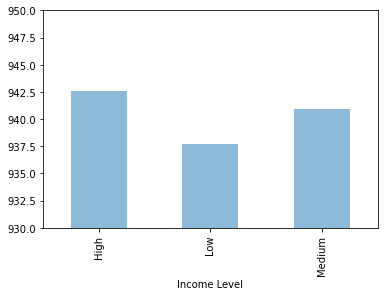

In [49]:
total.plot(kind='bar', alpha = 0.5)
plt.ylim(930, 950)



- What is the average balance of the customers grouped by `Income Level`? The returned result should have only two columns, `Income` and `Average Balance` of the customers. 

(930.0, 955.0)

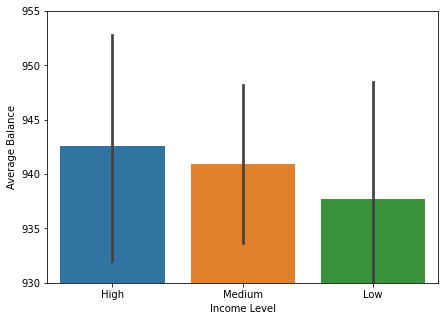

In [6]:
plt.figure(figsize=(7,5))
sns.barplot(x='Income Level', y='Average Balance', data=ccm)
plt.ylim(930,955)

- What is the average balance of the customers grouped by `number_of_bank_accounts_open`? The returned result should have only two columns, `number_of_bank_aaccounts_open` and `Average Balance` of the customers. 

In [7]:
total = ccm.groupby('# Bank Accounts Open')['Average Balance'].mean()
total

# Bank Accounts Open
1    941.533604
2    936.469491
3    948.284746
Name: Average Balance, dtype: float64

(927.0, 958.0)

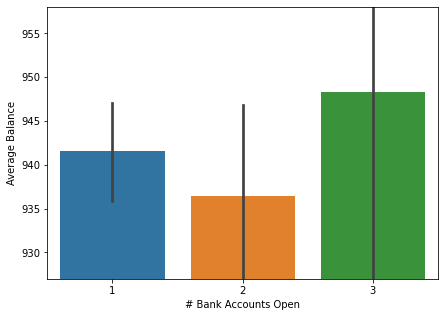

In [8]:
plt.figure(figsize=(7,5))
sns.barplot(x='# Bank Accounts Open', y='Average Balance', data=ccm)
plt.ylim(927,958)

- What is the average number of credit cards held by customers for each of the credit card ratings? The returned result should have only two columns, `rating` and `average number of credit cards`.

In [9]:
total = ccm.groupby('Credit Rating')['# Credit Cards Held'].mean()
total

Credit Rating
High      1.895240
Low       1.903811
Medium    1.911587
Name: # Credit Cards Held, dtype: float64

(1.8, 1.95)

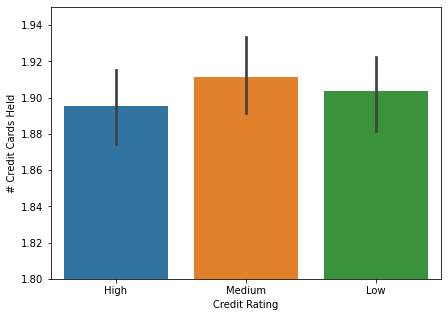

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(x='Credit Rating', y='# Credit Cards Held', data=ccm)
plt.ylim(1.8,1.95)

- Is there any correlation between the columns `credit_cards_held` and `number_of_bank_accounts_open`? You can analyze this by grouping the data by one of the variables and then aggregating the results of the other column. Visually check if there is a positive correlation or negative correlation or no correlation between the variables.

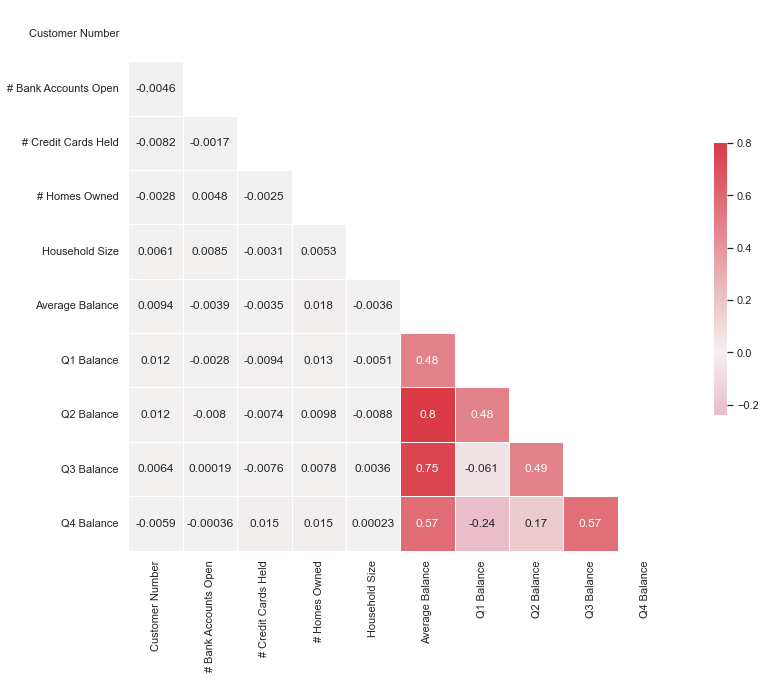

In [11]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(ccm.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(ccm.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

#Between the columns '# Credit Cards Held' and '# Bank Accounts Open' there is a negative correlation, which means that the two variables are correlated in the opposite direction. High values of one of them usually correspond to low values of the other and the other way round. Being very close to 0, it is said that they are uncorrelated.


- Check the number of customers in each category (ie number of credit cards held) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis.

In [12]:
for i in ['Offer Accepted','Reward','Mailer Type','Income Level','# Bank Accounts Open','Overdraft Protection','Credit Rating','# Credit Cards Held','# Homes Owned','Household Size','Own Your Home','Average Balance' ]:
  print('--------->CATEGORY: ',i)
  print(ccm[i].value_counts())

--------->CATEGORY:  Offer Accepted
No     16977
Yes     1023
Name: Offer Accepted, dtype: int64
--------->CATEGORY:  Reward
Air Miles    6061
Cash Back    5999
Points       5940
Name: Reward, dtype: int64
--------->CATEGORY:  Mailer Type
Postcard    9147
Letter      8853
Name: Mailer Type, dtype: int64
--------->CATEGORY:  Income Level
Medium    9013
High      4526
Low       4461
Name: Income Level, dtype: int64
--------->CATEGORY:  # Bank Accounts Open
1    13692
2     4012
3      296
Name: # Bank Accounts Open, dtype: int64
--------->CATEGORY:  Overdraft Protection
No     15322
Yes     2678
Name: Overdraft Protection, dtype: int64
--------->CATEGORY:  Credit Rating
High      6071
Medium    5972
Low       5957
Name: Credit Rating, dtype: int64
--------->CATEGORY:  # Credit Cards Held
2    7944
1    6154
3    3387
4     515
Name: # Credit Cards Held, dtype: int64
--------->CATEGORY:  # Homes Owned
1    14523
2     3292
3      185
Name: # Homes Owned, dtype: int64
--------->CATEGORY:  

8. Your managers are only interested in the customers with the following properties:

    - Credit rating medium or high
    - Credit cards held 2 or less
    - Owns their own home
    - Household size 3 or more

    For the rest of the things, they are not too concerned. Write code to find what are the options available for them. 

    Can you filter the customers who accepted the offers here?


In [15]:
rating = ccm[(ccm['Credit Rating'] == 'Medium') | (ccm['Credit Rating'] == 'High')]
cards = ccm[(ccm['# Credit Cards Held'] <= 2)]
Hhold = ccm[(ccm['Household Size'] >= 3)]
House = ccm[(ccm['Own Your Home'] == 'Yes')]

print("Credit rating medium or high: ", rating.shape)
print("Credit cards held 2 or less: ", cards.shape)       
print("Owns their own home: ", Hhold.shape)       
print("Household size 3 or more: ", House.shape) 

Credit rating medium or high:  (12043, 17)
Credit cards held 2 or less:  (14098, 17)
Owns their own home:  (14648, 17)
Household size 3 or more:  (11655, 17)


9. Your managers want to find out the list of customers whose average balance is less than the average balance of all the customers in the database. Write a query to show them the list of such customers.

In [15]:
print("List of customers whose average balance is less than the average balance of all customers: ")
print(ccm['Average Balance'].mean())
lowbalance =ccm[ccm['Average Balance'] < ccm['Average Balance'].mean()]
lowbalance

List of customers whose average balance is less than the average balance of all customers: 
940.5155624165554


,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
6,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
7,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
21,22,No,Points,Letter,Medium,1,No,Low,2,2,3,Yes,811.75,720.0,407.0,1224.0,896.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17988,17989,No,Air Miles,Letter,Medium,1,Yes,Medium,1,1,2,Yes,911.00,639.0,1209.0,1271.0,525.0
17990,17991,No,Air Miles,Letter,Medium,1,No,High,1,1,3,Yes,335.75,447.0,378.0,274.0,244.0
17993,17994,No,Points,Letter,Low,1,No,Low,3,1,4,Yes,925.50,1570.0,1432.0,589.0,111.0
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0


10. What is the number of people who accepted the offer vs the number of people who did not?

Number of people who accepted the offer vs the number of people who did not: 
No     16977
Yes     1023
Name: Offer Accepted, dtype: int64


(930.0, 945.0)

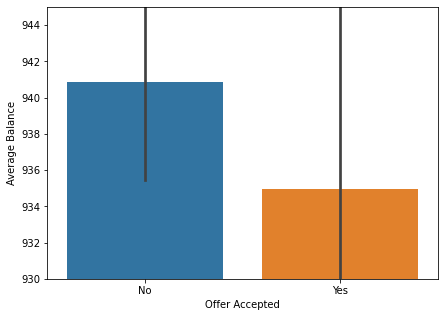

In [16]:
print("Number of people who accepted the offer vs the number of people who did not: ")
print(ccm['Offer Accepted'].value_counts())
plt.figure(figsize=(7,5))
sns.barplot(x='Offer Accepted', y='Average Balance', data=ccm)
plt.ylim(930,945)

11. Your managers are more interested in customers with a credit rating of high or medium. What is the difference in average balances of the customers with high credit card rating and low credit card rating?

Difference in average balances of the customers with high credit card rating and low credit card rating: 
Credit Rating
High      944.391573
Low       940.340745
Medium    936.748910
Name: Average Balance, dtype: float64


(930.0, 950.0)

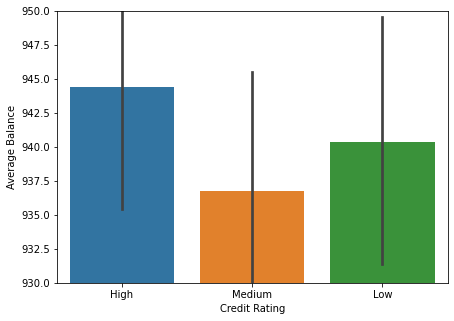

In [17]:
print("Difference in average balances of the customers with high credit card rating and low credit card rating: ")
print(ccm.groupby('Credit Rating')['Average Balance'].mean())
plt.figure(figsize=(7,5))
sns.barplot(x='Credit Rating', y='Average Balance', data=ccm)
plt.ylim(930,950)

12. In the database, which all types of communication (`Mailer Type`) were used and with how many customers?

Postcard    9147
Letter      8853
Name: Mailer Type, dtype: int64


(935.0, 945.0)

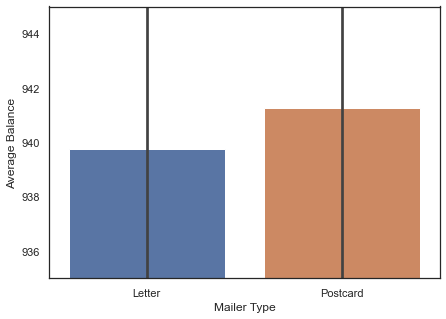

In [19]:
print(ccm['Mailer Type'].value_counts())
plt.figure(figsize=(7,5))

sns.barplot(x='Mailer Type', y='Average Balance', data=ccm)
plt.ylim(935,945)

13. Provide the details of the customer that is the 11th least `Q1_balance` in your database.

In [20]:
ccm.sort_values(by='Q1 Balance', ascending=True).head(11)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
14828,14829,No,Points,Postcard,Medium,1,No,Medium,2,1,2,Yes,166.00,0.0,32.0,499.0,133.0
10829,10830,No,Cash Back,Postcard,High,1,No,Low,1,1,4,Yes,174.25,0.0,465.0,23.0,209.0
17140,17141,No,Points,Letter,Medium,1,No,Low,2,1,4,Yes,241.50,0.0,182.0,348.0,436.0
11246,11247,No,Points,Postcard,Medium,1,Yes,Medium,3,1,3,Yes,207.25,0.0,425.0,135.0,269.0
5557,5558,No,Air Miles,Letter,Low,1,No,High,1,1,5,Yes,1086.50,0.0,1621.0,1542.0,1183.0
16312,16313,No,Points,Letter,Medium,1,Yes,Low,2,1,5,No,1008.50,1.0,1468.0,950.0,1615.0
5177,5178,No,Cash Back,Postcard,High,2,No,High,1,1,5,Yes,107.25,1.0,111.0,19.0,298.0
5710,5711,No,Points,Postcard,Medium,2,Yes,Medium,1,1,4,Yes,48.25,1.0,9.0,4.0,179.0
10234,10235,No,Points,Letter,Low,1,Yes,Medium,3,1,4,No,1188.75,1.0,1409.0,2168.0,1177.0
4546,4547,No,Points,Letter,Low,1,No,Low,2,1,2,Yes,235.75,1.0,225.0,333.0,384.0
